In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# read the data
data = pd.read_csv('/Users/baoan/Desktop/music_genre.csv')
data

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


# 1. Data Exploration

In [6]:
data.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')

In [7]:
# Check data type
data.dtypes

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [9]:
# Check the null data
data[data.isnull().any(axis=1)]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### There are only 5 rows that contain NaN values. We'll remove them:

In [10]:
# The drop the rows with null data 
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [11]:
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [12]:
#Information description of numeric data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
instance_id,50000.0,55888.396360,20725.256253,20002.000000,37973.5000,55913.500000,73863.250000,91759.000
popularity,50000.0,44.220420,15.542008,0.000000,34.0000,45.000000,56.000000,99.000
acousticness,50000.0,0.306383,0.341340,0.000000,0.0200,0.144000,0.552000,0.996
danceability,50000.0,0.558241,0.178632,0.059600,0.4420,0.568000,0.687000,0.986
duration_ms,50000.0,221252.602860,128671.957157,-1.000000,174800.0000,219281.000000,268612.250000,4830606.000
energy,50000.0,0.599755,0.264559,0.000792,0.4330,0.643000,0.815000,0.999
instrumentalness,50000.0,0.181601,0.325409,0.000000,0.0000,0.000158,0.155000,0.996
liveness,50000.0,0.193896,0.161637,0.009670,0.0969,0.126000,0.244000,1.000
loudness,50000.0,-9.133761,6.162990,-47.046000,-10.8600,-7.276500,-5.173000,3.744
speechiness,50000.0,0.093586,0.101373,0.022300,0.0361,0.048900,0.098525,0.942


In [13]:
# Information description of string data
data.describe(include=['O'])

,artist_name,track_name,key,mode,tempo,obtained_date,music_genre
count,50000,50000,50000,50000,50000,50000,50000
unique,6863,41699,12,2,29394,5,10
top,empty_field,Home,G,Major,?,4-Apr,Electronic
freq,2489,16,5727,32099,4980,44748,5000


#### Có 17 cột tính năng và một cột nhãn (music_genre). Trong số các tính năng, 12 tính năng là số (một trong số đó, tempo, không được phân loại và sẽ được xử lý sau) và 5 tính năng là phân loại.

#### Ngoài ra cũng có thể thấy các gợi ý cho các giá trị bị ẩn bị thiếu trong 3 tính năng ('tempo', 'artist_name' và 'duration_ms'). Những điều đó sẽ được giải quyết trong phần bên dưới.

In [14]:
# Check if the data is balanced
data['music_genre'].value_counts()

Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64

#### There are 10 different genres with equal distribution (balanced data). This means the accuracy score will be a good metric to use.

## Exploring the features one by one:

## Instance_id:

#### Đây chỉ là một chỉ mục nên sẽ loại bỏ nó.

In [15]:
data = data.drop(columns=['instance_id'])

## Artist's Names

In [16]:
# Print out the unique values
print(f"There are {data['artist_name'].nunique()} unique artists in the set")

There are 6863 unique artists in the set


In [17]:
# Attribute description
data['artist_name'].describe()

count           50000
unique           6863
top       empty_field
freq             2489
Name: artist_name, dtype: object

In [18]:
# Find the missing data
missing_artist = data[data['artist_name'] == 'empty_field']
missing_artist.head()

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
19,empty_field,7th Sevens,50.0,0.0281,0.656,307328.0,0.653,0.858000,F#,0.1120,-11.883,Minor,0.0396,117.999,4-Apr,0.199,Electronic
25,empty_field,Revolution,34.0,0.0236,0.715,221050.0,0.978,0.000493,D,0.2160,-1.538,Major,0.3620,125.109,4-Apr,0.418,Electronic
44,empty_field,World (The Price Of Love) - [Radio Edit] [2015...,31.0,0.0035,0.595,222147.0,0.904,0.003780,D,0.0533,-6.805,Minor,0.0349,127.61,4-Apr,0.841,Electronic
128,empty_field,Down With Me - VIP,32.0,0.0139,0.498,-1.0,0.945,0.647000,F,0.3380,-0.003,Minor,0.1370,149.888,4-Apr,0.179,Electronic
135,empty_field,Olvidela Compa,44.0,0.1530,0.792,265133.0,0.549,0.379000,F,0.3430,-9.855,Major,0.0456,120.01299999999999,4-Apr,0.476,Electronic


In [19]:
# Print out the percentage of data that is missed
print(f"Percent of missing artist names: {(missing_artist.shape[0]/data.shape[0])*100:2.4}%")

Percent of missing artist names: 4.978%


#### 5% quan sát thiếu tên của nghệ sĩ (được đánh dấu là 'empty_field'), nhưng các mục nhập này vẫn hợp lệ nếu không. chúng tôi sẽ không bỏ những quan sát này.

In [20]:
data[data['artist_name'] != 'empty_field'].groupby('artist_name')['music_genre'].nunique().value_counts(normalize=True)

1    0.799767
2    0.171087
3    0.027834
4    0.001312
Name: music_genre, dtype: float64

#### Đối với các mục có tên nghệ sĩ, có vẻ như bài hát của một nghệ sĩ cụ thể có ~80% cơ hội thuộc về một thể loại cụ thể.
#### Tuy nhiên, ở dạng hiện tại, nó không hữu ích cho việc phân loại các bài hát của các nghệ sĩ bên ngoài nhóm đào tạo và sẽ cần trích xuất các tính năng tổng quát hơn, bắt đầu với độ dài tên đơn giản nhất.

In [21]:
# Find the length of the artists names
data['length_name'] = data['artist_name'].str.len()

In [22]:
data[data['artist_name'] != 'empty_field'].groupby('music_genre')['length_name'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,4728.0,11.397631,4.898169,1.0,8.0,11.0,14.0,46.0
Anime,4728.0,12.198604,5.419303,2.0,8.0,12.0,15.0,35.0
Blues,4745.0,13.544573,5.425815,1.0,10.0,12.0,16.0,40.0
Classical,4734.0,16.336502,4.489369,4.0,13.0,15.0,20.0,52.0
Country,4779.0,12.656623,3.277890,3.0,11.0,12.0,14.0,41.0
Electronic,4777.0,9.734561,4.199621,2.0,7.0,9.0,12.0,26.0
Hip-Hop,4755.0,9.376025,3.986559,2.0,6.0,9.0,12.0,36.0
Jazz,4770.0,12.504193,4.777946,3.0,10.0,12.0,15.0,51.0
Rap,4737.0,9.645134,4.028050,2.0,7.0,9.0,12.0,38.0


In [23]:
data2 = data.drop(data[data["artist_name"] == "empty_field"].index)

In [24]:
artists = data2["artist_name"].value_counts()[:20].sort_values(ascending = True)
artists

ASIAN KUNG-FU GENERATION     89
Ryuichi Sakamoto             90
$uicideBoy$                  92
Logic                        92
Howard Shore                 93
Mac Miller                   97
Kevin Gates                 102
Pyotr Ilyich Tchaikovsky    103
The Black Keys              114
Thievery Corporation        122
Future                      124
Eminem                      147
Yuki Hayashi                167
Capcom Sound Team           169
Drake                       172
Frédéric Chopin             241
Johann Sebastian Bach       314
Ludwig van Beethoven        317
Wolfgang Amadeus Mozart     402
Nobuo Uematsu               429
Name: artist_name, dtype: int64

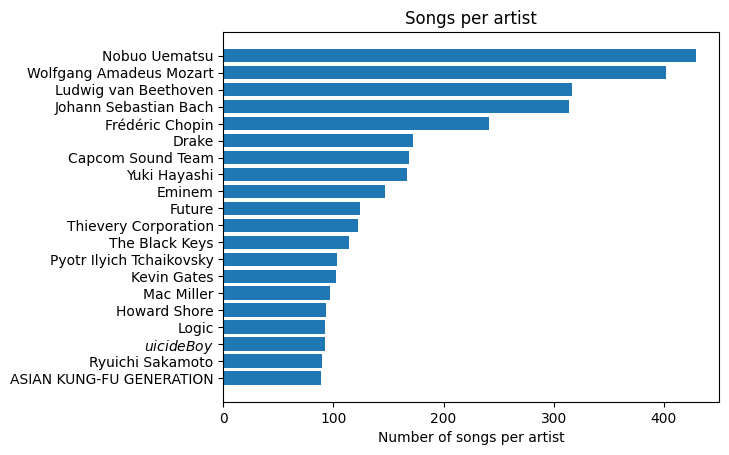

In [25]:
plt.barh(artists.index, artists)
plt.xlabel("Number of songs per artist")
plt.title("Songs per artist")
plt.show()

### Có vẻ như bộ dữ liệu được biên soạn bởi các tác giả Nhật Bản hoặc ở Nhật Bản vì một số nghệ sĩ trong top20 đến từ Đất nước mặt trời mọc. Hơn nữa, nhiều nhà soạn nhạc (ví dụ: Mozart, Beethoven, v.v.) cũng tìm thấy vị trí của mình trong danh sách này. Bây giờ, để tránh số lượng lớn các tính năng, artist_name sẽ bị xóa

In [26]:
data = data.drop(columns=['artist_name'])

In [27]:
# drop 'length_name' feature
data = data.drop(columns = ['length_name'])

## Track names

In [28]:
data['track_name'].describe()

count     50000
unique    41699
top        Home
freq         16
Name: track_name, dtype: object

### track_name chứa thông tin về tên bài hát. Theo như thống kê bên trên dataset chứa thông tin về 41699 bài hát vì nó có quá nhiều thuộc tính duy nhất và không giúp ích gì cho việc phân loại, ngược lại sẽ gây lỗi cho thuật toán nên sẽ loại bỏ nó.

In [29]:
data = data.drop(columns=['track_name'])

## Popularity

In [30]:
data.popularity.unique()

array([27., 31., 28., 34., 32., 47., 46., 43., 39., 22., 30., 50., 59.,
       29., 35., 44., 33., 56., 21., 48., 45., 53., 63., 25., 36., 37.,
       51., 55., 49., 41., 38., 52., 24., 42., 26., 96., 40., 23., 61.,
       54., 66., 70., 67., 60., 58., 65., 69., 72., 64., 62., 57.,  0.,
       76., 20., 74., 71., 84., 68., 18., 82.,  3., 11., 17., 15., 12.,
       10., 13., 16., 14.,  9., 19.,  8.,  7.,  4.,  2.,  1.,  5.,  6.,
       79., 73., 75., 78., 83., 81., 80., 77., 85., 97., 88., 87., 86.,
       99., 89., 93., 90., 94., 91., 95., 92.])

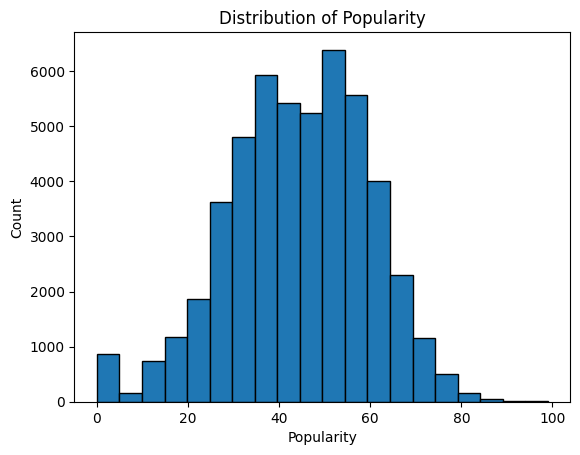

In [31]:
plt.hist(data['popularity'], bins=20, edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Distribution of Popularity')
plt.show()

In [32]:
data.groupby('music_genre')['popularity'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,5000.0,50.2242,7.664260,0.0,45.00,49.0,55.0,83.0
Anime,5000.0,24.2716,9.675151,0.0,17.00,23.0,30.0,65.0
Blues,5000.0,34.8040,9.716422,0.0,28.75,33.0,39.0,80.0
Classical,5000.0,29.3158,14.100519,0.0,25.00,32.0,38.0,68.0
Country,5000.0,46.0100,9.771540,0.0,39.00,44.0,52.0,82.0
Electronic,5000.0,38.1118,9.715378,0.0,31.00,37.0,44.0,96.0
Hip-Hop,5000.0,58.3996,8.302271,18.0,52.00,57.0,63.0,96.0
Jazz,5000.0,40.9286,9.517333,0.0,36.00,40.0,46.0,79.0
Rap,5000.0,60.4974,8.160620,14.0,55.00,59.0,65.0,99.0


In [33]:
data['popularity'].describe()

count    50000.000000
mean        44.220420
std         15.542008
min          0.000000
25%         34.000000
50%         45.000000
75%         56.000000
max         99.000000
Name: popularity, dtype: float64

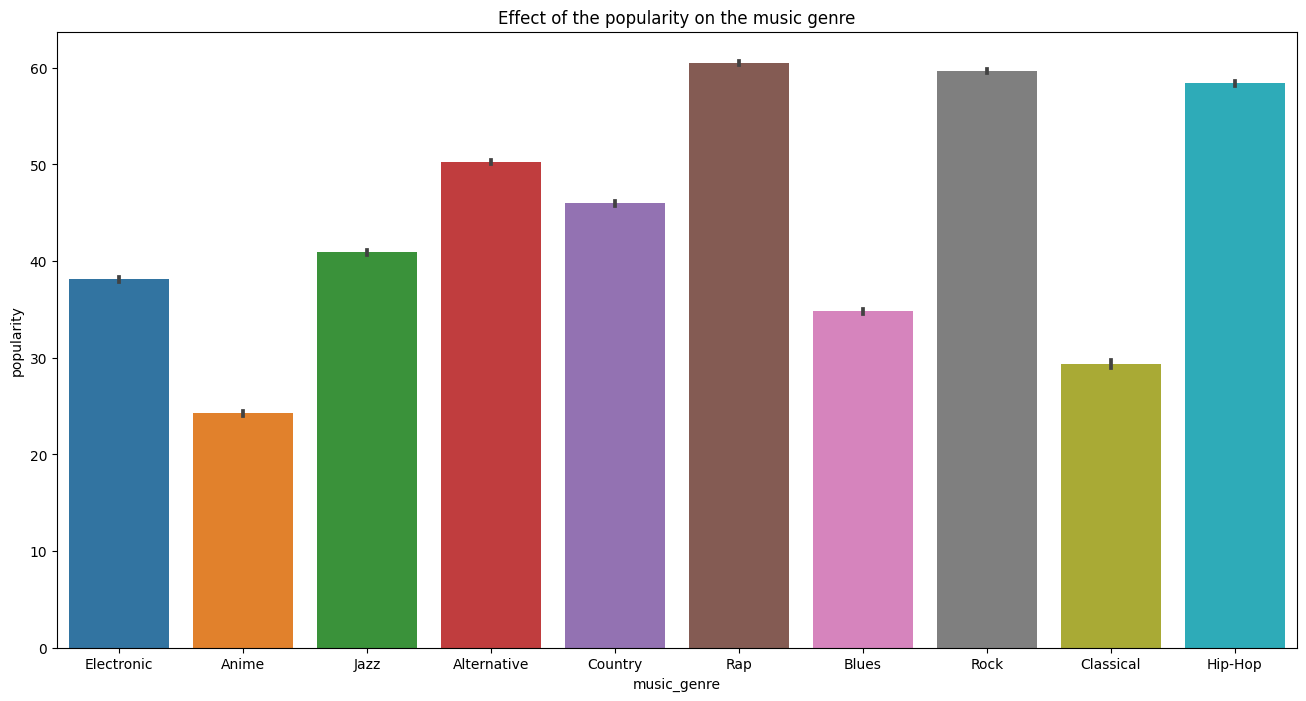

In [34]:
plt.figure(figsize=(16,8))
sns.barplot(x = 'music_genre', y = 'popularity', data = data)
plt.title('Effect of the popularity on the music genre')
plt.show()

### Tính năng này cho thấy một loạt các bản phân phối tốt đẹp cho các thể loại khác nhau. Chắc chắn có thể hữu ích cho việc phân loại.
### Rap, Hip-Hop và Rock dường như là những thể loại phổ biến nhất, trong khi Anime, Blues và Cổ điển là ít phổ biến nhất. 4 thể loại khác ở đâu đó ở giữa.

## acousticness

In [35]:
data['acousticness'].describe()

count    50000.000000
mean         0.306383
std          0.341340
min          0.000000
25%          0.020000
50%          0.144000
75%          0.552000
max          0.996000
Name: acousticness, dtype: float64

/var/folders/5z/n3l41jzd14z23v42607tmb9r0000gn/T/ipykernel_90454/2230170405.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2=data.groupby(["music_genre"]).mean()


<Axes: xlabel='music_genre'>

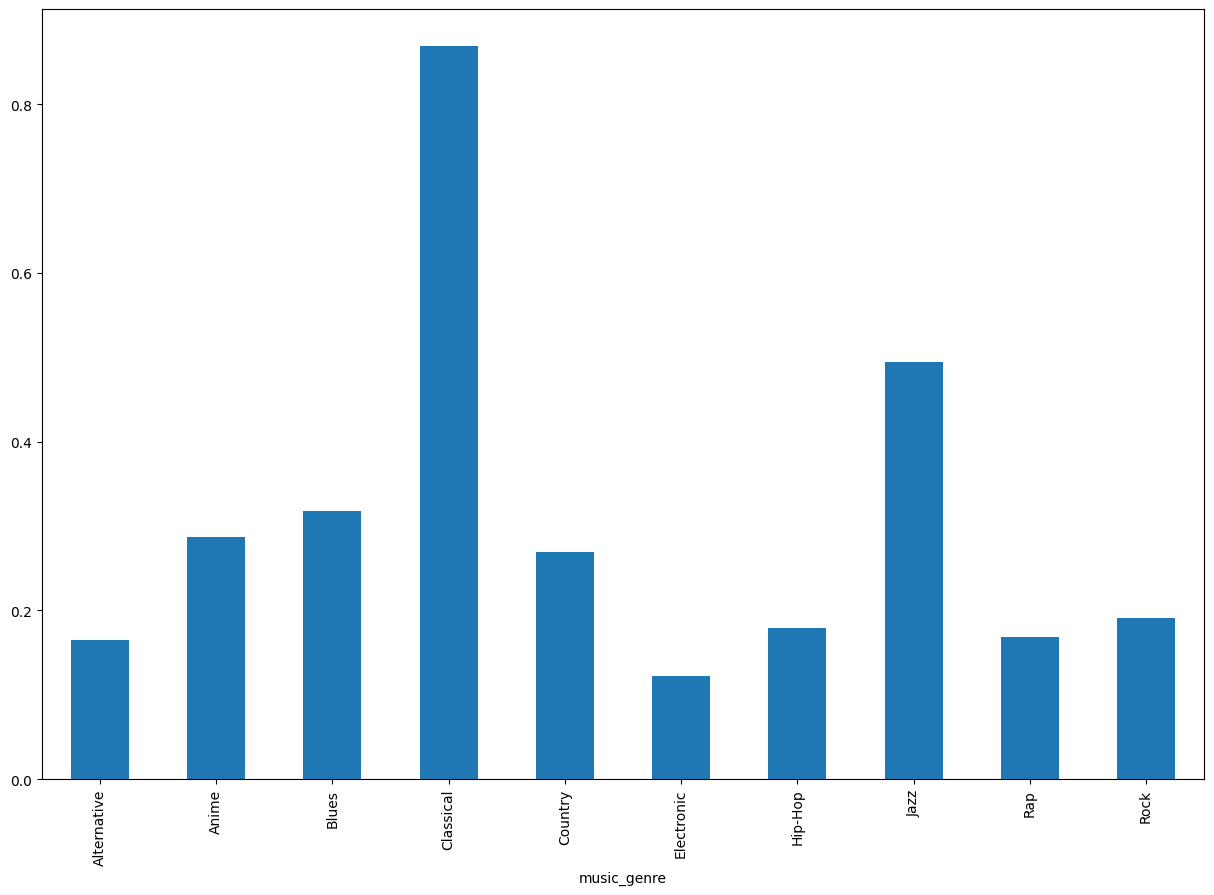

In [36]:
df2=data.groupby(["music_genre"]).mean()
df2["acousticness"].plot(kind='bar', figsize=(15,10))

### Điều thú vị là nhạc cổ điển và nhạc jazz có tỷ lệ âm thanh cao hơn các loại còn lại

## Danceability

/var/folders/5z/n3l41jzd14z23v42607tmb9r0000gn/T/ipykernel_90454/2480102127.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2=data.groupby(["music_genre"]).mean()


<Axes: xlabel='music_genre'>

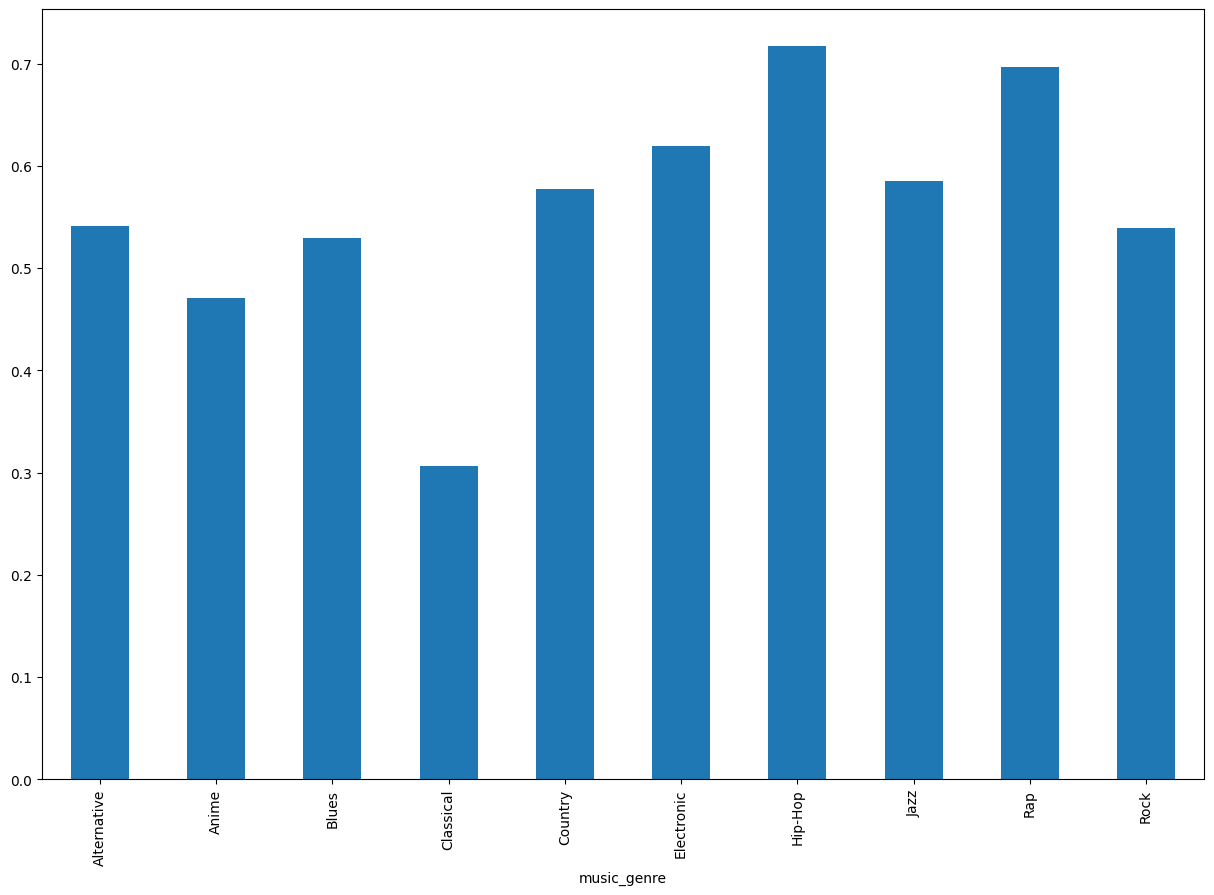

In [37]:
df2=data.groupby(["music_genre"]).mean()
df2["danceability"].plot(kind='bar', figsize=(15,10))

#### Nhạc cổ điển lại nổi lên, nhưng Rap và Hip-Hop cũng có thể được phân biệt với phần còn lại (dường như chúng thường đi cùng nhau).

## Duration

In [38]:
data.groupby('music_genre')['duration_ms'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,5000.0,210404.8078,90366.002886,-1.0,185994.75,219561.5,255583.00,675653.0
Anime,5000.0,208880.8290,105275.946177,-1.0,146250.25,230205.5,272993.25,1295600.0
Blues,5000.0,229301.0962,131931.237262,-1.0,171910.00,221140.0,280033.25,2019293.0
Classical,5000.0,278014.3464,219698.722816,-1.0,148770.25,241640.0,362070.25,3195440.0
Country,5000.0,195556.0686,77252.730320,-1.0,179328.25,207073.5,233839.25,599315.0
Electronic,5000.0,244553.3832,164125.128913,-1.0,192655.50,236888.0,300000.00,4830606.0
Hip-Hop,5000.0,198395.9458,86465.775861,-1.0,167707.00,209056.0,248627.00,723573.0
Jazz,5000.0,238092.4468,133485.337615,-1.0,170491.00,236040.0,304278.50,1352413.0
Rap,5000.0,196508.7920,85618.048197,-1.0,168339.00,207509.5,244454.25,579293.0


#### -1.0 rõ ràng không phải là phép đo thời gian hợp lệ. Đây là những giá trị còn thiếu.

In [39]:
miss_duration = data[data['duration_ms'] == -1].shape[0]
num_obs_tot = data.shape[0]
print(f"There are {miss_duration} missing values, which accounts for {(miss_duration/num_obs_tot)*100:2.4}% of the data points.")

There are 4939 missing values, which accounts for 9.878% of the data points.


#### Gần 10% bài dự thi bị thiếu thời lượng và so với thống kê hầu hết các bài đều gần giống nhau không có giá trị phân loại nên sẽ tiến hành bỏ tính năng này

In [40]:
# drop 'duration_ms' feature
data = data.drop(columns = ['duration_ms'])

## Energy

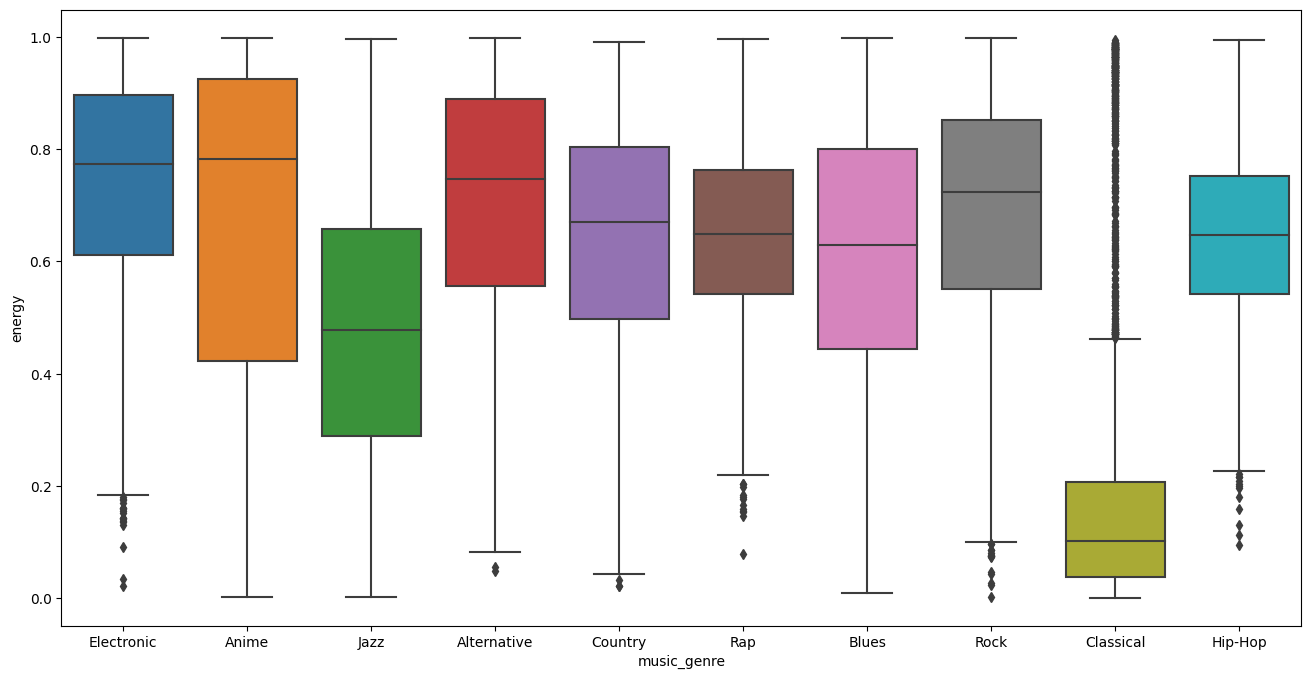

In [41]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data, x='music_genre', y='energy')
plt.show()

#### Như thường lệ, nhạc cổ điển (classical) nổi bật hơn phần còn lại (và Jazz ở mức độ thấp hơn nhiều). Rap và Hip-Hop vẫn phù hợp với nhau.

## Instrumentalness

In [42]:
data['instrumentalness'].value_counts()

0.000000    15001
0.898000       70
0.902000       69
0.897000       66
0.912000       66
            ...  
0.000049        1
0.000876        1
0.000094        1
0.000787        1
0.000926        1
Name: instrumentalness, Length: 5131, dtype: int64

<Axes: xlabel='instrumentalness', ylabel='Count'>

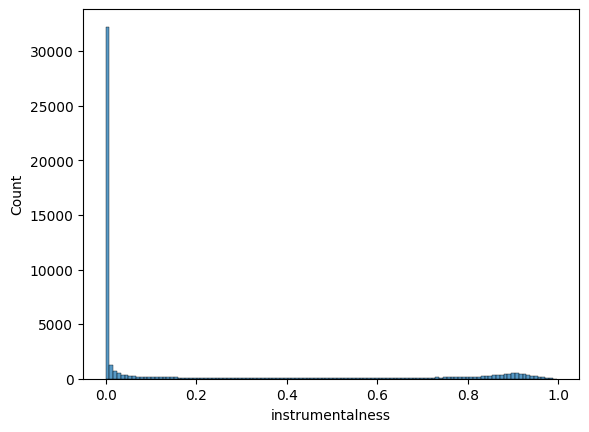

In [43]:
sns.histplot(x='instrumentalness',data=data)

#### Số lượng mục nhập 0,0 lớn như vậy có thể biểu thị các giá trị bị thiếu chứ không phải là điểm dữ liệu thực, vì vậy sẽ không điền các giá trị bị thiếu. Thay vào đó sẽ loại bỏ hoàn toàn tính năng này.

In [44]:
data = data.drop(columns=['instrumentalness'])

## Key

In [45]:
data['key'].unique()

array(['A#', 'D', 'G#', 'C#', 'F#', 'B', 'G', 'F', 'A', 'C', 'E', 'D#'],
      dtype=object)

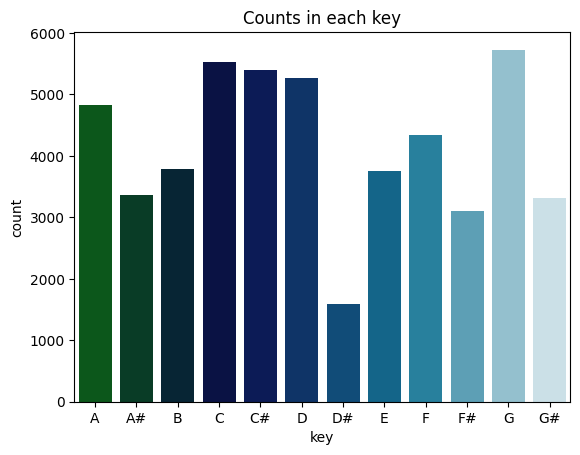

In [46]:
def plot_counts(feature, order = None):
    sns.countplot(x = feature, data = data, palette = "ocean", order = order)
    plt.title(f"Counts in each {feature}")
    plt.show()
plot_counts("key", ["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#"])

In [47]:
# Data before encoder
data['key'].value_counts()

G     5727
C     5522
C#    5405
D     5265
A     4825
F     4341
B     3789
E     3760
A#    3356
G#    3319
F#    3101
D#    1590
Name: key, dtype: int64

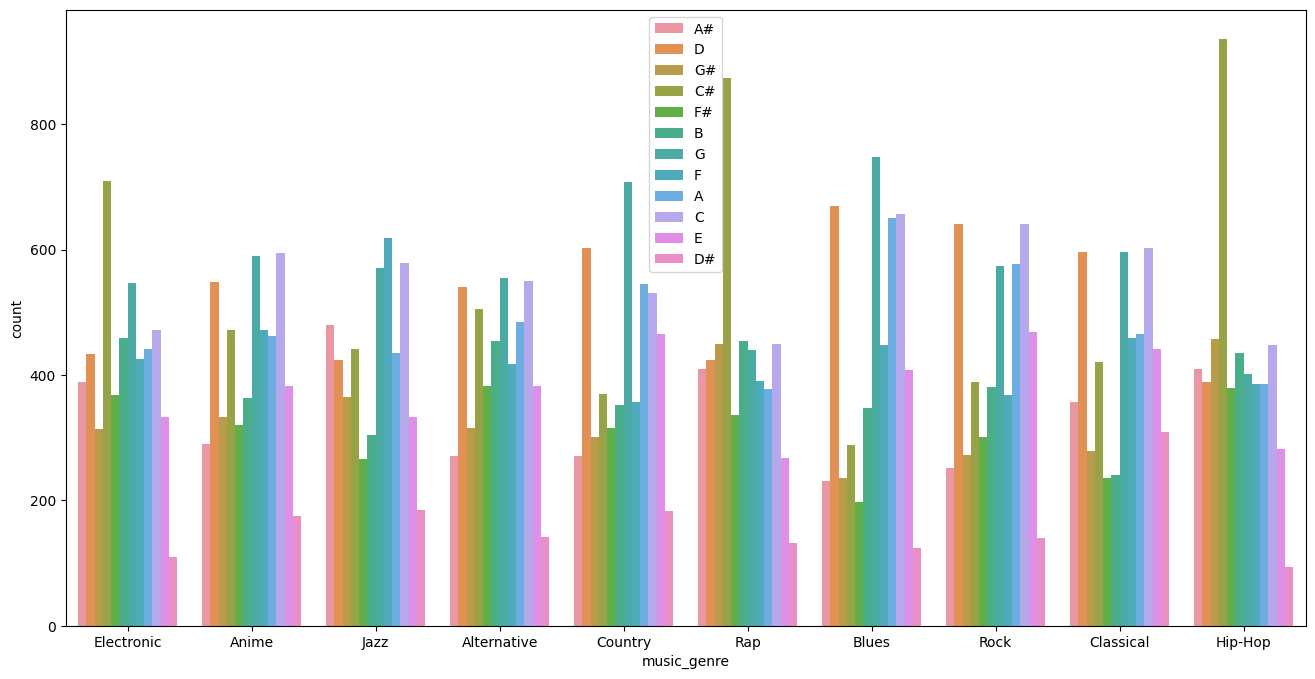

In [48]:
plt.figure(figsize=(16,8))
sns.countplot(x="music_genre", hue="key",data=data)
plt.legend(loc=0)
plt.show()

- Có thể thấy với một số thể loại như điện tử, rap, hiphop thì key = C# là chính
- Country và blues, key = D hoặc key = G chiếm đa số
- Key = D# khá thấp ở tất cả các thể loại
- Phần còn lại phân bố khá đều

In [49]:
# Encode key feature
from sklearn.preprocessing import LabelEncoder
key_encoder = LabelEncoder()
data["key"] = key_encoder.fit_transform(data["key"])

In [50]:
# Data after encoder
data['key'].value_counts()

10    5727
3     5522
4     5405
5     5265
0     4825
8     4341
2     3789
7     3760
1     3356
11    3319
9     3101
6     1590
Name: key, dtype: int64

#### Các thể loại khác nhau có mức chênh lệch đáng kể. Chúng tôi sẽ giữ tính năng này, nhưng sử dụng Label Encoder để làm cho nó hữu ích.

## Liveness

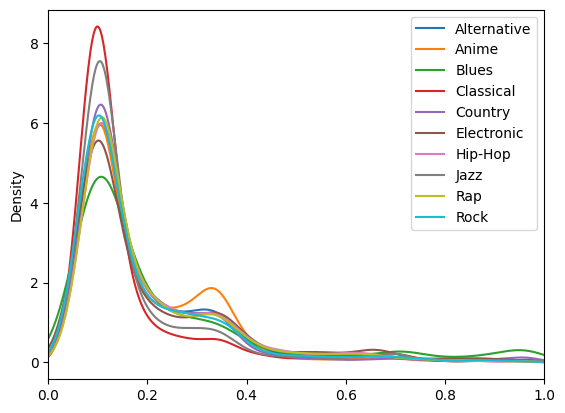

In [51]:
data.groupby('music_genre')['liveness'].plot.kde()
plt.legend()
plt.xlim([0,1])
plt.show()

#### Các bản phân phối có vẻ sai lệch giống nhau đối với tất cả các thể loại, vì vậy tính năng này có thể sẽ không đóng góp nhiều cho mô hình nên sẽ thử cả khi có và không có tính năng này.

In [52]:
data = data.drop(columns=['liveness'])

## Loudness

In [53]:
data['loudness'].describe()

count    50000.000000
mean        -9.133761
std          6.162990
min        -47.046000
25%        -10.860000
50%         -7.276500
75%         -5.173000
max          3.744000
Name: loudness, dtype: float64

In [54]:
data.groupby('music_genre')['loudness'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,5000.0,-6.517714,2.767036,-22.191,-7.98250,-5.9930,-4.50000,1.342
Anime,5000.0,-7.963515,6.246825,-41.234,-10.69125,-5.6605,-3.58900,1.893
Blues,5000.0,-9.009528,3.833429,-31.284,-11.31600,-8.4555,-6.17675,3.744
Classical,5000.0,-21.586253,7.730315,-47.046,-26.44300,-21.8725,-17.23300,-2.304
Country,5000.0,-7.297150,3.210097,-27.119,-8.80225,-6.5275,-5.02000,-0.521
Electronic,5000.0,-7.034238,3.683159,-25.582,-9.26050,-6.4650,-4.37600,1.585
Hip-Hop,5000.0,-6.851158,2.457706,-25.602,-8.16025,-6.5090,-5.20350,1.012
Jazz,5000.0,-11.185364,4.662576,-35.200,-13.62125,-10.3455,-7.84350,-1.002
Rap,5000.0,-6.668337,2.427193,-22.589,-7.97650,-6.3550,-5.03775,-0.092


/var/folders/5z/n3l41jzd14z23v42607tmb9r0000gn/T/ipykernel_90454/2354139938.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1=data.groupby(["music_genre"]).mean()


<Axes: xlabel='music_genre'>

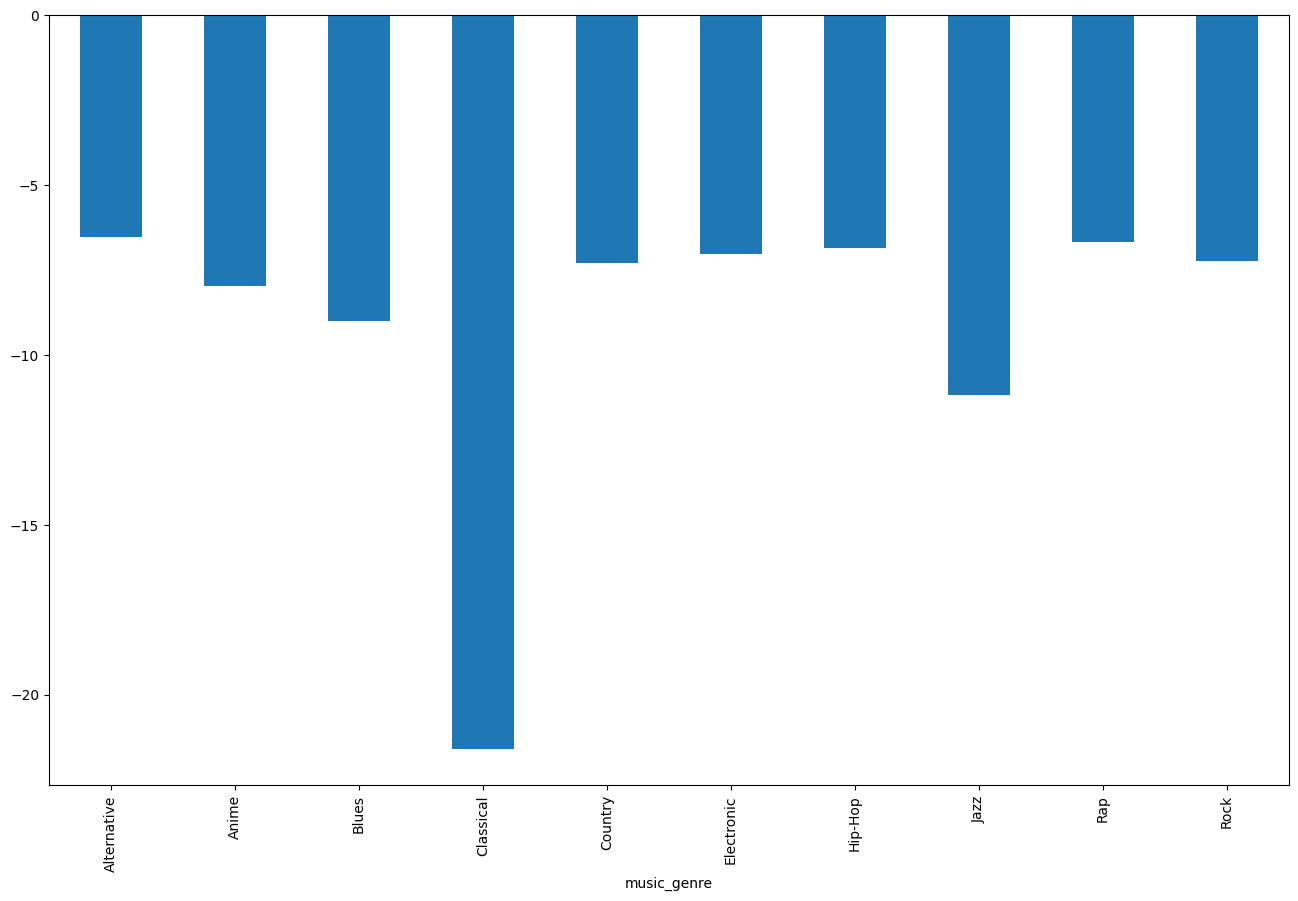

In [55]:
df1=data.groupby(["music_genre"]).mean()
df1["loudness"].plot(kind='bar', figsize=(16,10))

#### Như thường lệ, nhạc cổ điển (classical) khác xa so với phần còn lại, tiếp theo là Jazz (và Blues) cũng có phần khác biệt.

## Mode

In [56]:
data['mode'].unique()

array(['Minor', 'Major'], dtype=object)

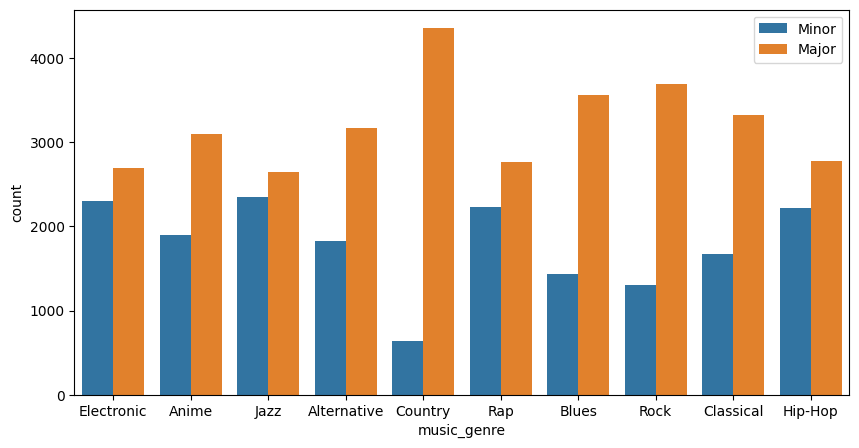

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(x="music_genre", hue="mode",data=data)
plt.legend(loc=0)
plt.show()

### Tất cả các thể loại dường như đều ưu tiên chế độ "Major", nhưng ở các mức độ khác nhau. Nó rõ rệt nhất trong thể loại Country nên sẽ sử dụng tính năng này sau khi mã hóa.

In [58]:
# Data before encoder
data['mode'].value_counts()

Major    32099
Minor    17901
Name: mode, dtype: int64

In [59]:
# Encode mode feature
key_encoder = LabelEncoder()
data["mode"] = key_encoder.fit_transform(data["mode"])

In [60]:
# Data after encoder
data['mode'].value_counts()

0    32099
1    17901
Name: mode, dtype: int64

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   popularity     50000 non-null  float64
 1   acousticness   50000 non-null  float64
 2   danceability   50000 non-null  float64
 3   energy         50000 non-null  float64
 4   key            50000 non-null  int64  
 5   loudness       50000 non-null  float64
 6   mode           50000 non-null  int64  
 7   speechiness    50000 non-null  float64
 8   tempo          50000 non-null  object 
 9   obtained_date  50000 non-null  object 
 10  valence        50000 non-null  float64
 11  music_genre    50000 non-null  object 
dtypes: float64(7), int64(2), object(3)
memory usage: 4.6+ MB


## Speechiness

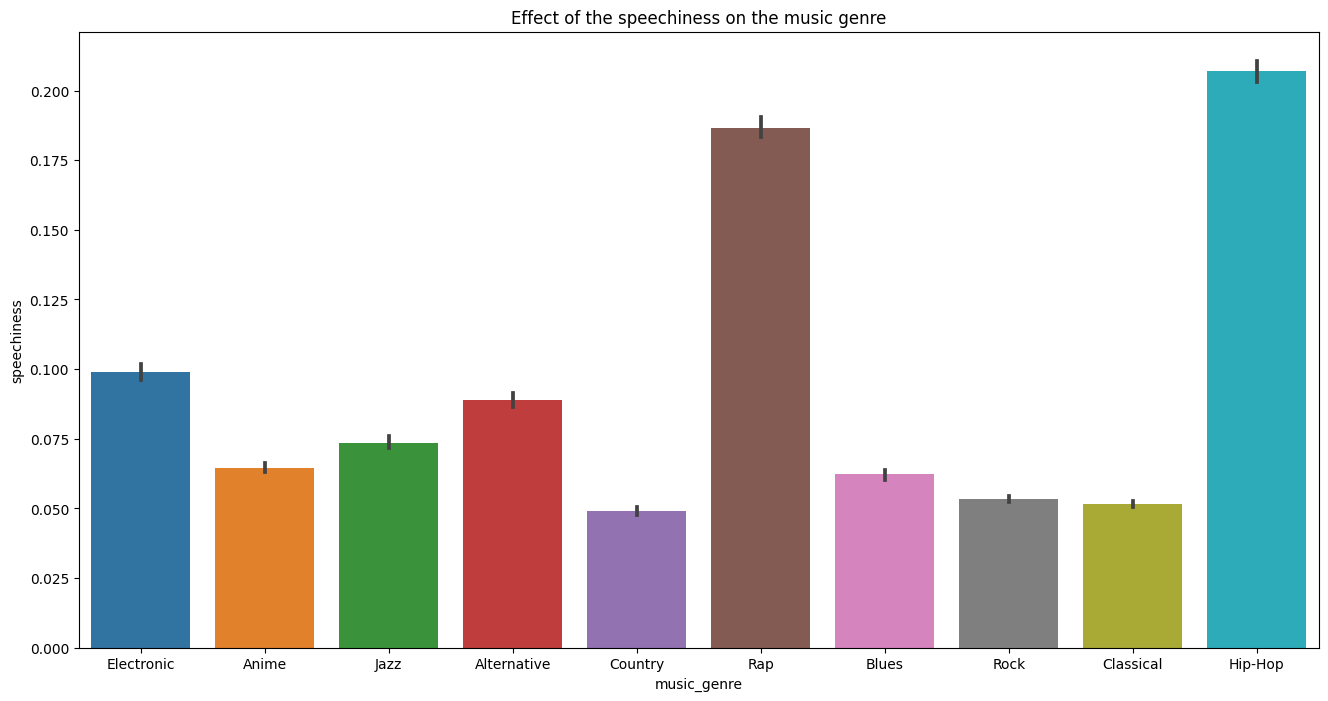

In [62]:
plt.figure(figsize=(16,8))
sns.barplot(x = 'music_genre', y = 'speechiness', data = data)
plt.title('Effect of the speechiness on the music genre')
plt.show()

#### Tính năng này sẽ góp phần đặc biệt vào việc xác định Hip-Hop và Rap.

## Tempo

In [63]:
data.groupby('music_genre')['tempo'].describe()

,count,unique,top,freq
music_genre,,,,
Alternative,5000,4236,?,505
Anime,5000,4134,?,503
Blues,5000,4376,?,530
Classical,5000,4380,?,500
Country,5000,4233,?,514
Electronic,5000,3644,?,534
Hip-Hop,5000,4115,?,480
Jazz,5000,4302,?,479
Rap,5000,4076,?,496


#### This feature should be numeric. The "?" is a missing value.

In [64]:
print(f"This feature contains {(data[data['tempo'] == '?'].shape[0]/data.shape[0])*100:2.4}% missing values")

This feature contains 9.96% missing values


In [65]:
# replace "?" with np.nan and correctly classify the feature
data.loc[data['tempo'] == '?', 'tempo'] = np.nan
data = data.astype({'tempo': np.float64})
data["tempo"] = np.around(data["tempo"], decimals = 2)

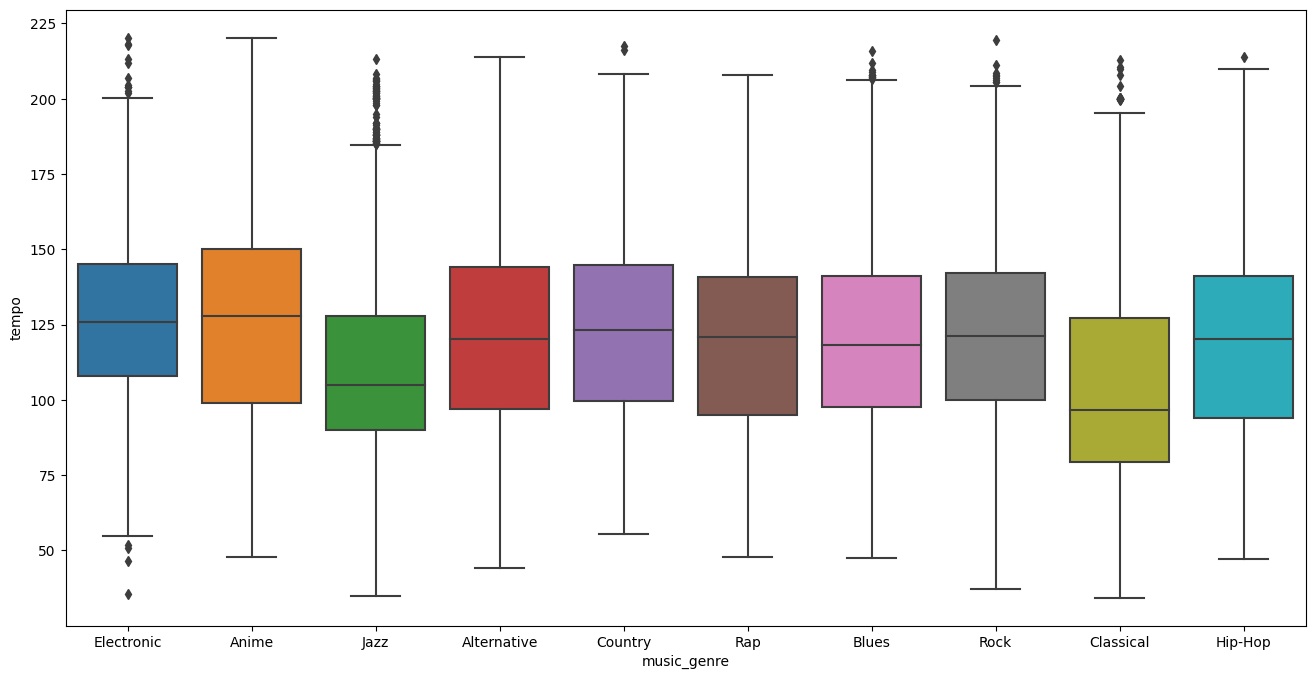

In [66]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data, x='music_genre', y='tempo')
plt.show()

### Sự khác biệt giữa các thể loại là không lớn nên sẽ bỏ tính năng này.

In [67]:
data = data.drop(columns=['tempo'])

## Obtained date

In [68]:
data['obtained_date'].unique()

array(['4-Apr', '3-Apr', '5-Apr', '1-Apr', '0/4'], dtype=object)

#### Chỉ cung cấp 4 ngày mà dữ liệu được lấy nó không hữu ích vì vậy sẽ loại bỏ.

In [69]:
data = data.drop(columns=['obtained_date'])

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    50000 non-null  float64
 1   acousticness  50000 non-null  float64
 2   danceability  50000 non-null  float64
 3   energy        50000 non-null  float64
 4   key           50000 non-null  int64  
 5   loudness      50000 non-null  float64
 6   mode          50000 non-null  int64  
 7   speechiness   50000 non-null  float64
 8   valence       50000 non-null  float64
 9   music_genre   50000 non-null  object 
dtypes: float64(7), int64(2), object(1)
memory usage: 3.8+ MB


## Valence

In [71]:
data.groupby('music_genre')['valence'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,5000.0,0.447513,0.216445,0.0342,0.28300,0.4285,0.60000,0.983
Anime,5000.0,0.437670,0.248353,0.0000,0.23200,0.4390,0.63200,0.990
Blues,5000.0,0.580788,0.224741,0.0315,0.41000,0.5900,0.76000,0.985
Classical,5000.0,0.210523,0.197650,0.0000,0.05650,0.1400,0.30525,0.982
Country,5000.0,0.536732,0.221114,0.0396,0.36100,0.5270,0.71625,0.977
Electronic,5000.0,0.389884,0.239673,0.0205,0.18900,0.3585,0.55900,0.992
Hip-Hop,5000.0,0.474927,0.220622,0.0336,0.30300,0.4735,0.64300,0.979
Jazz,5000.0,0.509248,0.251076,0.0289,0.29675,0.5150,0.71100,0.985
Rap,5000.0,0.454999,0.213480,0.0336,0.28900,0.4460,0.61200,0.970


<Axes: xlabel='music_genre'>

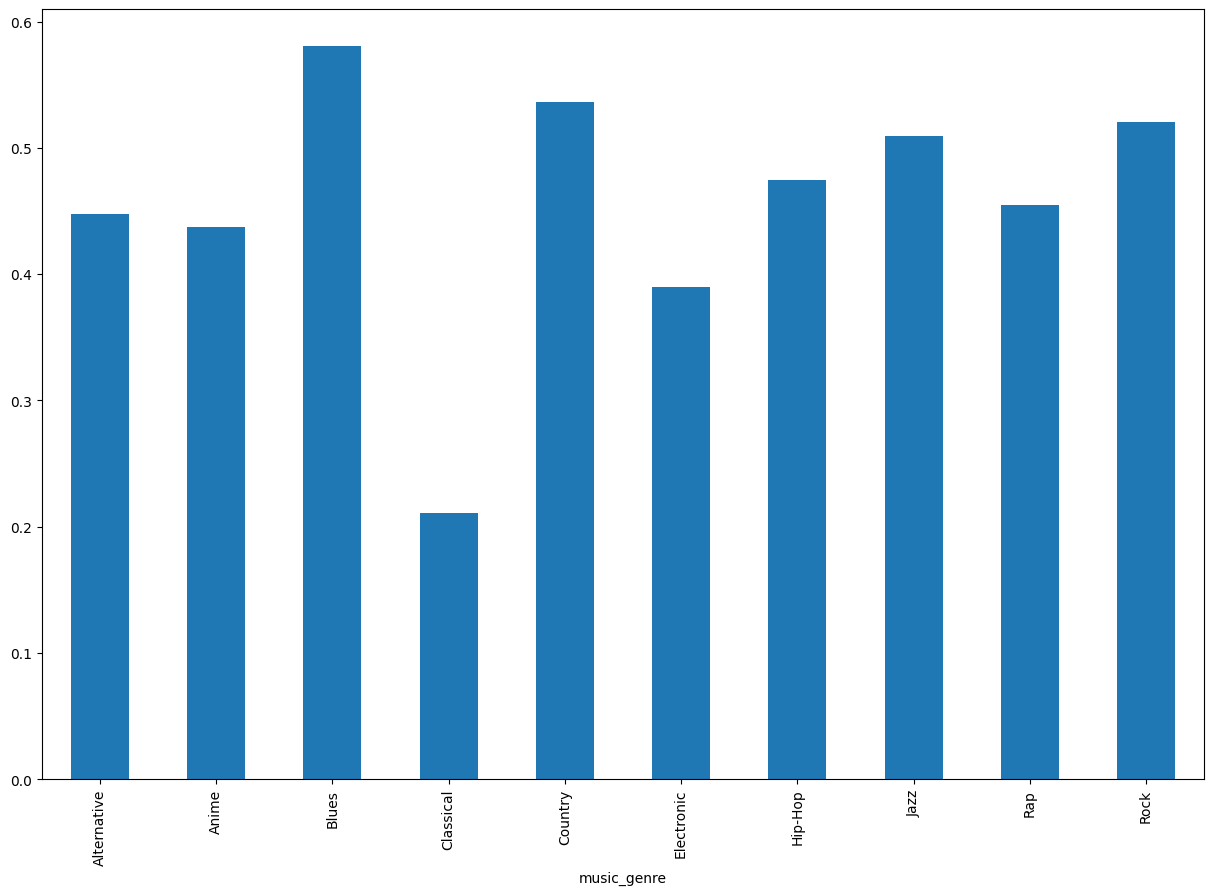

In [72]:
df1=data.groupby(["music_genre"]).mean()
df1["valence"].plot(kind='bar', figsize=(15,10))

#### Một lần nữa, chỉ có nhạc cổ điển (classical) thực sự nổi bật so với phần còn lại.

### music_genre

#### Có những thể loại có các thông số tương tự nhau nên sẽ tiến hành gom nhóm những thể loại có chung thông số với nhau để tăng tỷ lệ chính xác

In [73]:
# Group some genres with the same parameters together
data.music_genre = data.music_genre.replace('Rock', 'Rock, Alternative or Country')
data.music_genre = data.music_genre.replace('Alternative', 'Rock, Alternative or Country')
data.music_genre = data.music_genre.replace('Country', 'Rock, Alternative or Country')
data.music_genre = data.music_genre.replace('Rap', 'Rap or Hip-Hop')
data.music_genre = data.music_genre.replace('Hip-Hop', 'Rap or Hip-Hop')
data.music_genre = data.music_genre.replace('Jazz', 'Jazz, Blues or Electronic')
data.music_genre = data.music_genre.replace('Blues', 'Jazz, Blues or Electronic')
data.music_genre = data.music_genre.replace('Electronic', 'Jazz, Blues or Electronic')

In [74]:
# # Group some genres with the same parameters together
# data.music_genre = data.music_genre.replace('Rock', 'Rock, Alternative or Country')
# data.music_genre = data.music_genre.replace('Alternative', 'Rock, Alternative or Country')
# data.music_genre = data.music_genre.replace('Country', 'Rock, Alternative or Country')
# data.music_genre = data.music_genre.replace('Rap', 'Rap  Hip-Hop')
# data.music_genre = data.music_genre.replace('Hip-Hop', 'Rap and Hip-Hop')
# data.music_genre = data.music_genre.replace('Jazz', 'Jazz, Blues')
# data.music_genre = data.music_genre.replace('Blues', 'Jazz, Blues')

In [75]:
data['music_genre'].value_counts()

Jazz, Blues or Electronic       15000
Rock, Alternative or Country    15000
Rap or Hip-Hop                  10000
Anime                            5000
Classical                        5000
Name: music_genre, dtype: int64

#### Một lần nữa, chỉ có nhạc cổ điển (classical) thực sự nổi bật so với phần còn lại.

## EDA Summary:
### Labels:
Có 5 thể loại âm nhạc có khả năng như nhau (bộ dữ liệu cân bằng):
1. Jazz, Blues or Electronic
2. Rock, Alternative or Country
3. Rap or Hip-Hop
4. Classical
5. Anime  
### Features:
**Các tính năng hữu ích:**
1. popularity 
2. acousticness
3. danceability 
4. energy
5. key - một cột phân loại chứa 12 danh mục duy nhất đã được mã hóa bằng label encoder.
6. loudness
7. mode - một cột phân loại chỉ chứa 2 danh mục duy nhất đã được mã hóa bằng label encoder.
8. speechiness   
9. valence

**Các tính năng không hữu ích đã bị xóa:**
1. instance_id - only an index.
2. obtained_date - chỉ chứa 4 ngày thu thập dữ liệu liên tiếp không có giá trị phân loại.
3. instrumentalness - chứa 30% giá trị còn thiếu.
4. artist_name and track_name - chứa nhiều giá trị duy nhất và một nhạc sĩ có thể sáng tác nhiều thể loại nên sẽ loại bỏ.

**Đánh giá tổng quan:** 
- Có vẻ như hầu hết các thể loại có xu hướng phân phối rất giống nhau ở hầu hết các tính năng, khiến cho bất kỳ mô hình nào cũng khó phân biệt giữa chúng. 
- Ngoại lệ hiển nhiên là nhạc cổ điển, có nhiều đặc điểm phân bố rất khác nhau.
- Thể loại Anime cũng cho thấy một số đặc điểm khác biệt, giống như Jazz, ở một mức độ thấp hơn nhiều. 
- Hip-Hop và Rap cực kỳ giống nhau về mọi đặc điểm, nhưng lại tách biệt với các thể loại còn lại ở một số đặc điểm. Chúng có thể dễ dàng được xác định là một thể loại chung.
- Nói chung, các tính năng hiện tại khó có thể đưa ra dự đoán tuyệt vời cho tất cả các thể loại.

In [76]:
data.to_csv("test_v4.csv")

In [77]:
df = pd.read_csv('test_v4.csv')
df

,Unnamed: 0,popularity,acousticness,danceability,energy,key,loudness,mode,speechiness,valence,music_genre
0,0,27.0,0.00468,0.652,0.941,1,-5.201,1,0.0748,0.759,"Jazz, Blues or Electronic"
1,1,31.0,0.01270,0.622,0.890,5,-7.043,1,0.0300,0.531,"Jazz, Blues or Electronic"
2,2,28.0,0.00306,0.620,0.755,11,-4.617,0,0.0345,0.333,"Jazz, Blues or Electronic"
3,3,34.0,0.02540,0.774,0.700,4,-4.498,0,0.2390,0.270,"Jazz, Blues or Electronic"
4,4,32.0,0.00465,0.638,0.587,9,-6.266,0,0.0413,0.323,"Jazz, Blues or Electronic"
...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,59.0,0.03340,0.913,0.574,4,-7.022,0,0.2980,0.330,Rap or Hip-Hop
49996,49996,72.0,0.15700,0.709,0.362,2,-9.814,0,0.0550,0.113,Rap or Hip-Hop
49997,49997,51.0,0.00597,0.693,0.763,5,-5.443,0,0.1460,0.395,Rap or Hip-Hop
49998,49998,65.0,0.08310,0.782,0.472,10,-5.016,1,0.0441,0.354,Rap or Hip-Hop
